In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import KernelPCA

c:\users\evergreen\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
stocks = pd.read_csv(os.path.join('data2','sp500_closes-12.10.2017.csv'),index_col=0)
stock_list = stocks.columns.tolist()
print("^GSPC and stocks:\n",stock_list)
#print(stocks.head())
print("Stocks shape:",stocks.shape)
#print(stocks.describe())
num_stocks = len(stock_list)

^GSPC and stocks:
 ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BCR', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CS

In [3]:
data = pd.DataFrame()
#drop those stocks with empty row/rows
data = stocks.copy()
data = data.dropna(axis=1,how='any')
data_list = data.columns.tolist()
num_data = len(data_list)

dji = pd.DataFrame(data.pop('^GSPC'))
print("Data shape: ", data.shape)
print("Data describe():\n", data.describe())

Data shape:  (2519, 455)
Data describe():
                MMM          ABT          ACN         ATVI          AYI  \
count  2519.000000  2519.000000  2519.000000  2519.000000  2519.000000   
mean    105.094356    30.257969    64.580856    20.313498   101.622113   
std      47.207209    10.214600    31.919704    13.875548    73.263748   
min      33.676079    15.887850    21.798466     7.476433    18.978987   
25%      67.305042    20.747893    34.071701    10.876490    41.487908   
50%      82.301125    28.410650    59.703915    13.803167    63.732956   
75%     147.019554    39.419266    89.709701    23.428058   165.751022   
max     237.679993    56.320000   143.289993    66.160004   278.224304   

              ADBE          AMD          AAP          AES          AET  \
count  2519.000000  2519.000000  2519.000000  2519.000000  2519.000000   
mean     57.224657     5.685058    90.718941    11.058889    64.396844   
std      34.009126     3.125815    47.465046     2.267024    38.7053

In [4]:
#PCA analysis. Normalize the data using lambda function
scale_function = lambda x: (x - x.mean()) / x.std()
X=data.apply(scale_function)
print ("data after normalization shape: ",X.shape)
print ("data after normalization describe\n", X.describe())
pca = KernelPCA().fit(X)
print ("Number of Eigenvalue(components) from the model: ",len(pca.lambdas_))

data after normalization shape:  (2519, 455)
data after normalization describe
                 MMM           ABT          ACN          ATVI           AYI  \
count  2.519000e+03  2.519000e+03  2519.000000  2.519000e+03  2.519000e+03   
mean   9.026347e-17 -1.805269e-16     0.000000 -9.026347e-17 -1.353952e-16   
std    1.000000e+00  1.000000e+00     1.000000  1.000000e+00  1.000000e+00   
min   -1.512868e+00 -1.406822e+00    -1.340313 -9.251573e-01 -1.128022e+00   
25%   -8.004988e-01 -9.310278e-01    -0.955809 -6.801178e-01 -8.207907e-01   
50%   -4.828337e-01 -1.808509e-01    -0.152788 -4.691945e-01 -5.171611e-01   
75%    8.881101e-01  8.968825e-01     0.787252  2.244639e-01  8.753157e-01   
max    2.808589e+00  2.551449e+00     2.465848  3.304122e+00  2.410499e+00   

              ADBE           AMD          AAP           AES           AET  \
count  2519.000000  2.519000e+03  2519.000000  2.519000e+03  2.519000e+03   
mean      0.000000  7.898053e-17     0.000000 -4.287515e-16  3.

In [5]:
#first 10 eigenvalue
print("First 10 eigenvalue: ",(pca.lambdas_)[:10].round())

First 10 eigenvalue:  [ 878664.   89480.   65541.   28909.   16238.   15765.    7859.    5504.
    3908.    3624.]


In [6]:
#normaize to percentage
get_weight = lambda x: x / x.sum()
print("First 10 components wieght: ",get_weight(pca.lambdas_)[:10])
print("First 10 components total wieght: ",get_weight(pca.lambdas_)[:10].sum())
print("First 5 components total wieght: ",get_weight(pca.lambdas_)[:5].sum())
print("First 2 components total wieght: ",get_weight(pca.lambdas_)[:2].sum())
print("First 1 components total wieght: ",get_weight(pca.lambdas_)[:1].sum())

First 10 components wieght:  [ 0.76692977  0.07810154  0.05720646  0.02523278  0.01417305  0.01376066
  0.00685919  0.00480439  0.00341111  0.00316291]
First 10 components total wieght:  0.973641844374
First 5 components total wieght:  0.941643596262
First 2 components total wieght:  0.845031312748
First 1 components total wieght:  0.766929772386


5 individual component shape: (2519, 5)
[[-10.68842318  -8.47499489  18.16637745   3.4211028   -1.5434698 ]
 [-11.65915328  -8.31332397  16.86185024   3.41287082  -1.34524739]
 [-11.71488674  -8.13917955  16.87607003   3.19147531  -1.50045292]
 ..., 
 [ 39.08925931 -12.9604636    2.07669209  -9.03121548   5.76995336]
 [ 38.60803039 -12.8088424    1.97677622  -9.03843188   5.77508602]
 [ 38.76044196 -12.90159389   1.95497484  -9.20291213   5.72661615]]
                ^GSPC       PCA1      PCA2       PCA3      PCA4      PCA5
Date                                                                     
10/31/07  1549.380005 -10.688423 -8.474995  18.166377  3.421103 -1.543470
11/1/07   1508.439941 -11.659153 -8.313324  16.861850  3.412871 -1.345247
11/2/07   1509.650024 -11.714887 -8.139180  16.876070  3.191475 -1.500453
11/5/07   1502.170044 -11.923770 -8.195689  16.591420  3.126108 -1.414454
11/6/07   1520.270020 -11.522640 -8.097800  17.336810  2.968521 -1.560292
5 individual component wit

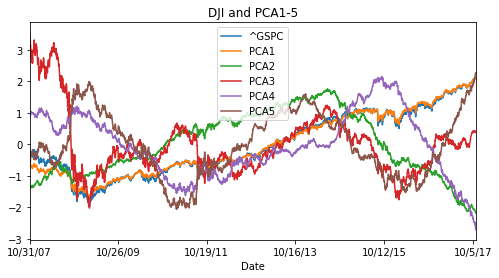

In [7]:
#Construct PCA index
%matplotlib inline

pca_comps=KernelPCA(n_components=5).fit_transform(X)

dji['PCA1'] = pca_comps[:,0]
dji['PCA2'] = pca_comps[:,1]
dji['PCA3'] = pca_comps[:,2]
dji['PCA4'] = pca_comps[:,3]
dji['PCA5'] = pca_comps[:,4]
print("5 individual component shape:",pca_comps.shape)
print(pca_comps)
print(dji.head())
print("5 individual component with dji shape:",dji.shape)
dji.apply(scale_function).plot(title="DJI and PCA1-5",figsize=(8, 4))
plt.show()

In [8]:
data['PCA1'] = pca_comps[:,0]
data['PCA2'] = pca_comps[:,1]
data['PCA3'] = pca_comps[:,2]
data['PCA4'] = pca_comps[:,3]
data['PCA5'] = pca_comps[:,4]

print ("data and PCA:", data.head())

data and PCA:                 MMM        ABT        ACN       ATVI        AYI       ADBE  \
Date                                                                         
10/31/07  66.495193  20.041937  31.417177  10.807923  36.697865  47.900002   
11/1/07   64.601082  19.858467  30.958595  10.515447  35.508411  46.919998   
11/2/07   65.363365  19.832788  30.894228  10.533727  37.149689  47.880001   
11/5/07   65.486534  19.821775  30.210373  10.465178  36.052422  47.700001   
11/6/07   65.794510  19.939198  29.180569  10.296091  36.946823  47.630001   

            AMD        AAP        AES        AET    ...          XLNX  \
Date                                                ...                 
10/31/07  13.08  32.951408  18.492378  51.325520    ...     18.963839   
11/1/07   12.80  33.859238  18.276449  50.274712    ...     18.831707   
11/2/07   13.17  33.588818  18.716951  49.689903    ...     18.746214   
11/5/07   13.42  33.946148  18.932886  49.753880    ...     18.590780   
1

In [9]:
corr1 = data.apply(scale_function).corr()
#print (": \n",corr1)
corr2 =corr1.iloc[0:num_data-1,num_data-1:num_data+5]
print ("corr2:\n", corr2)
#Save the correlation map for optimization
corr2.to_csv(os.path.join('data2','pca500-components.csv'))

corr2:
            PCA1      PCA2      PCA3      PCA4      PCA5
MMM    0.987235 -0.095806 -0.055962 -0.039496  0.016730
ABT    0.965670  0.062359 -0.063589  0.109156  0.124772
ACN    0.975498 -0.074403 -0.158498 -0.050076 -0.018694
ATVI   0.871687 -0.435483 -0.066469 -0.108992  0.064664
AYI    0.918923 -0.114110 -0.156262  0.204377 -0.166625
ADBE   0.932863 -0.327060  0.005629 -0.047785  0.081352
AMD    0.157628 -0.546601  0.264420 -0.672061 -0.112660
AAP    0.892985  0.170808 -0.170094  0.254977 -0.170448
AES    0.165348  0.049970  0.869019  0.052021 -0.119121
AET    0.964745 -0.219741 -0.015837  0.061280  0.016132
AMG    0.847269  0.427273  0.198010  0.131094  0.089089
AFL    0.920222 -0.121960  0.236311 -0.083054 -0.042883
A      0.956807 -0.051635  0.080027 -0.227623 -0.005423
APD    0.981236 -0.069946  0.048883  0.052448 -0.077509
AKAM   0.827788  0.238820  0.092986  0.163066 -0.201961
ALK    0.960140 -0.122508 -0.146917  0.097016 -0.038015
ALB    0.846319 -0.101752  0.008694 -0.4

In [10]:
y = corr2.index.values
corr2_array=corr2.values
print ("y:\n",y)
print("Lenth y: ",len(y))

y:
 ['MMM' 'ABT' 'ACN' 'ATVI' 'AYI' 'ADBE' 'AMD' 'AAP' 'AES' 'AET' 'AMG' 'AFL'
 'A' 'APD' 'AKAM' 'ALK' 'ALB' 'ARE' 'ALXN' 'ALGN' 'AGN' 'ADS' 'LNT' 'ALL'
 'GOOGL' 'GOOG' 'MO' 'AMZN' 'AEE' 'AAL' 'AEP' 'AXP' 'AIG' 'AMT' 'AMP' 'ABC'
 'AME' 'AMGN' 'APH' 'APC' 'ADI' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA'
 'AIV' 'AAPL' 'AMAT' 'ADM' 'ARNC' 'AJG' 'AIZ' 'T' 'ADSK' 'ADP' 'AZO' 'AVB'
 'AVY' 'BHGE' 'BLL' 'BAC' 'BK' 'BCR' 'BAX' 'BBT' 'BDX' 'BRK.B' 'BBY' 'BIIB'
 'BLK' 'HRB' 'BA' 'BWA' 'BXP' 'BSX' 'BMY' 'BF.B' 'CHRW' 'CA' 'COG' 'CDNS'
 'CPB' 'COF' 'CAH' 'KMX' 'CCL' 'CAT' 'CBG' 'CBS' 'CELG' 'CNC' 'CNP' 'CTL'
 'CERN' 'CF' 'SCHW' 'CHK' 'CVX' 'CMG' 'CB' 'CHD' 'CI' 'XEC' 'CINF' 'CTAS'
 'CSCO' 'C' 'CTXS' 'CLX' 'CME' 'CMS' 'KO' 'CTSH' 'CL' 'CMCSA' 'CMA' 'CAG'
 'CXO' 'COP' 'ED' 'STZ' 'COO' 'GLW' 'COST' 'CCI' 'CSX' 'CMI' 'CVS' 'DHI'
 'DHR' 'DRI' 'DVA' 'DE' 'DAL' 'XRAY' 'DVN' 'DLR' 'DFS' 'DISCA' 'DISH'
 'DLTR' 'D' 'DOV' 'DWDP' 'DTE' 'DRE' 'DUK' 'DXC' 'ETFC' 'EMN' 'ETN' 'EBAY'
 'ECL' 'EIX' 'EW' 'EA' 'EMR' 'ETR' 

c:\users\evergreen\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


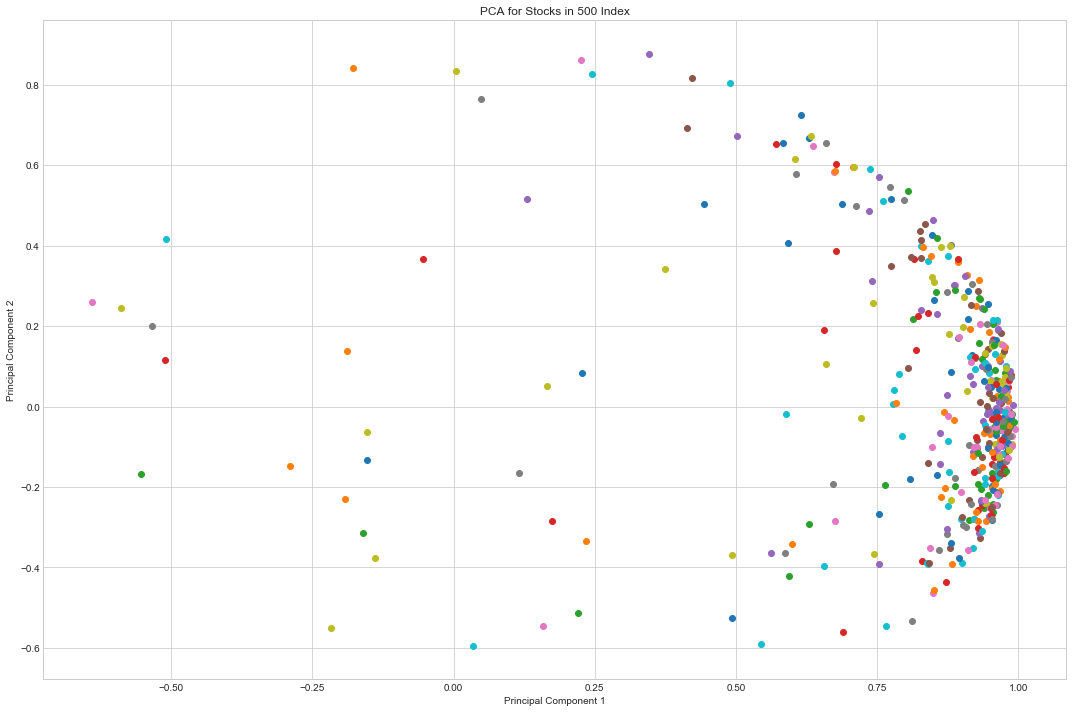

In [11]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))
    cmap='nipy_spectral'
    for lab, col in zip(y,range(0,len(y))):
    
    #for lab in data_list:
        plt.scatter(corr2_array[y==lab, 0],
                    corr2_array[y==lab, 1],
                    cmap='nipy_spectral')
                    #label=lab,cmap='nipy_spectral') the label is not important with about 500 stocks
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title ('PCA for Stocks in 500 Index')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


In [12]:
from scipy.spatial import distance

pointA = corr2.loc[['AMZN'],['PCA1','PCA2']].values
print ("pointA:", pointA)
dis_list = np.empty(shape=[0, 1])
for i in (corr2.index):
    pointB=corr2.loc[[i],['PCA1','PCA2']].values
    dis1 = distance.euclidean(pointA, pointB)
    dis_list = np.append(dis_list, dis1)
    #print("dist: ", dis_list)
corr3 = corr2.copy()
corr3['Distance']=dis_list
corr3.sort_values('Distance',ascending=False,inplace=True)
corr4=corr3.head(9).append(corr3.loc['AMZN'])
print(corr4)

pointA: [[ 0.92144733 -0.27888979]]
          PCA1      PCA2      PCA3      PCA4      PCA5  Distance
APA  -0.639347  0.259524  0.531898 -0.323917 -0.263473  1.651050
CHK  -0.589443  0.245435  0.717297 -0.027842 -0.046916  1.599283
FCX  -0.508427  0.416629  0.564571 -0.386398 -0.227312  1.590059
RRC  -0.177889  0.842170  0.314208 -0.062877  0.178443  1.570132
DVN  -0.533611  0.201010  0.731674 -0.035740 -0.165281  1.532155
MOS  -0.510461  0.116095  0.681626 -0.027476 -0.264971  1.485387
NEM  -0.552846 -0.167523 -0.012832 -0.602370 -0.381328  1.478494
MRO   0.004617  0.835073  0.470225 -0.113130  0.103871  1.442738
NOV   0.048224  0.764688  0.509564 -0.238656 -0.085752  1.360726
AMZN  0.921447 -0.278890 -0.170548 -0.146603 -0.000243  0.000000
